- **Regression** logistique : col num uniquement
score train, score test, pipeline(knnimputer, standard scaler, regression log) = dans gridsearch avec 10 crossvalidation et ressortir le score

- *Pipeline*(features num, knnimputer, scaler, et features cat à onehot (knn imputer random forest classifier,dummy regressor, reg log, KNN)) = calculer ACCURACY SCORE
et resultgrid

On peut frac = 0.25 , 0.30 ou 0.20


[mon super lien](http://cneuuziu.com)

In [51]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [52]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector

# Feature Selection
import shap

<div style="background-color:#9dedde; padding: 10px">
<h2>Chargement des données</h2>
</div>

In [3]:
df = pd.read_csv("app_train_sample_clean.csv")
df.head(5)

TYPE_CONTRAT  AGE DATE_NAISSANCE  ID_CLIENT  CIBLE       STATUT_FAMILIAL  \
0   Cash loans   48     1976-05-11     196888      0               Married   
1   Cash loans   55     1969-12-04     101392      0        Civil marriage   
2   Cash loans   25     1999-01-09     435135      0  Single / not married   
3   Cash loans   30     1994-11-25     396314      0               Married   
4   Cash loans   44     1980-03-16     341153      1               Married   

   JOURS_EMPLOI  TOTAL_CREDIT  REMB_MENSUEL PROPRIETAIRE_BIEN_IMMO  \
0          -152     1350000.0       39604.5                      Y   
1          -717      573628.5       24435.0                      Y   
2          -667      298512.0       19948.5                      N   
3         -1825      218016.0       17352.0                      N   
4          -159     1006920.0       42790.5                      Y   

   CNT_FAM_MEMBERS TYPE_REVENUS GENRE  MONTANT_PRIX_BIENS  \
0              2.0      Working     F           1350000.0   
1              2.0      Working     F            463500.0   
2              1.0      Working     F            270000.0   
3              2.0      Working     M            180000.0   
4              2.0      Working     F            900000.0   

                NIVEAU_EDUCATION  REVENU_TOTAL  SOURCE_EXTERNE_2  \
0               Higher education      135000.0          0.761443   
1               Higher education       81000.0          0.396825   
2               Higher education      112500.0          0.385353   
3               Higher education       81000.0          0.545649   
4  Secondary / secondary special       90000.0          0.444443   

   SOURCE_EXTERNE_3 PROPRIETAIRE_VOITURE  
0          0.757069                    N  
1          0.818248                    Y  
2               NaN                    N  
3          0.336062                    N  
4          0.673830                    N

In [4]:
df.shape

(30751, 19)

In [5]:
df.tail()

TYPE_CONTRAT  AGE DATE_NAISSANCE  ID_CLIENT  CIBLE  \
30746       Cash loans   42     1982-12-20     311641      0   
30747       Cash loans   38     1986-05-29     151728      1   
30748  Revolving loans   44     1980-11-04     384640      0   
30749       Cash loans   60     1964-01-04     437079      0   
30750       Cash loans   59     1965-09-01     389739      0   

            STATUT_FAMILIAL  JOURS_EMPLOI  TOTAL_CREDIT  REMB_MENSUEL  \
30746               Married          -914      808650.0       23773.5   
30747  Single / not married         -7215       85500.0        9108.0   
30748               Married        365243      247500.0       12375.0   
30749                 Widow        365243      270000.0        9828.0   
30750                 Widow          -974     1288350.0       37053.0   

      PROPRIETAIRE_BIEN_IMMO  CNT_FAM_MEMBERS   TYPE_REVENUS GENRE  \
30746                      N              3.0  State servant     F   
30747                      Y              1.0        Working     M   
30748                      Y              2.0      Pensioner     F   
30749                      Y              1.0      Pensioner     F   
30750                      Y              1.0        Working     F   

       MONTANT_PRIX_BIENS               NIVEAU_EDUCATION  REVENU_TOTAL  \
30746            675000.0  Secondary / secondary special       90000.0   
30747             85500.0  Secondary / secondary special       40500.0   
30748            247500.0               Higher education       69750.0   
30749            270000.0  Secondary / secondary special       36000.0   
30750           1125000.0  Secondary / secondary special      148500.0   

       SOURCE_EXTERNE_2  SOURCE_EXTERNE_3 PROPRIETAIRE_VOITURE  
30746          0.621768          0.759712                    N  
30747          0.393861               NaN                    N  
30748          0.673987               NaN                    Y  
30749          0.546689               NaN                    N  
30750          0.670388          0.157595                    Y

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TYPE_CONTRAT            30751 non-null  object 
 1   AGE                     30751 non-null  int64  
 2   DATE_NAISSANCE          30751 non-null  object 
 3   ID_CLIENT               30751 non-null  int64  
 4   CIBLE                   30751 non-null  int64  
 5   STATUT_FAMILIAL         30751 non-null  object 
 6   JOURS_EMPLOI            30751 non-null  int64  
 7   TOTAL_CREDIT            30751 non-null  float64
 8   REMB_MENSUEL            30751 non-null  float64
 9   PROPRIETAIRE_BIEN_IMMO  30751 non-null  object 
 10  CNT_FAM_MEMBERS         30751 non-null  float64
 11  TYPE_REVENUS            30751 non-null  object 
 12  GENRE                   30751 non-null  object 
 13  MONTANT_PRIX_BIENS      30727 non-null  float64
 14  NIVEAU_EDUCATION        30751 non-null

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Analyse exploratoire</b>
    </h2>
</div>


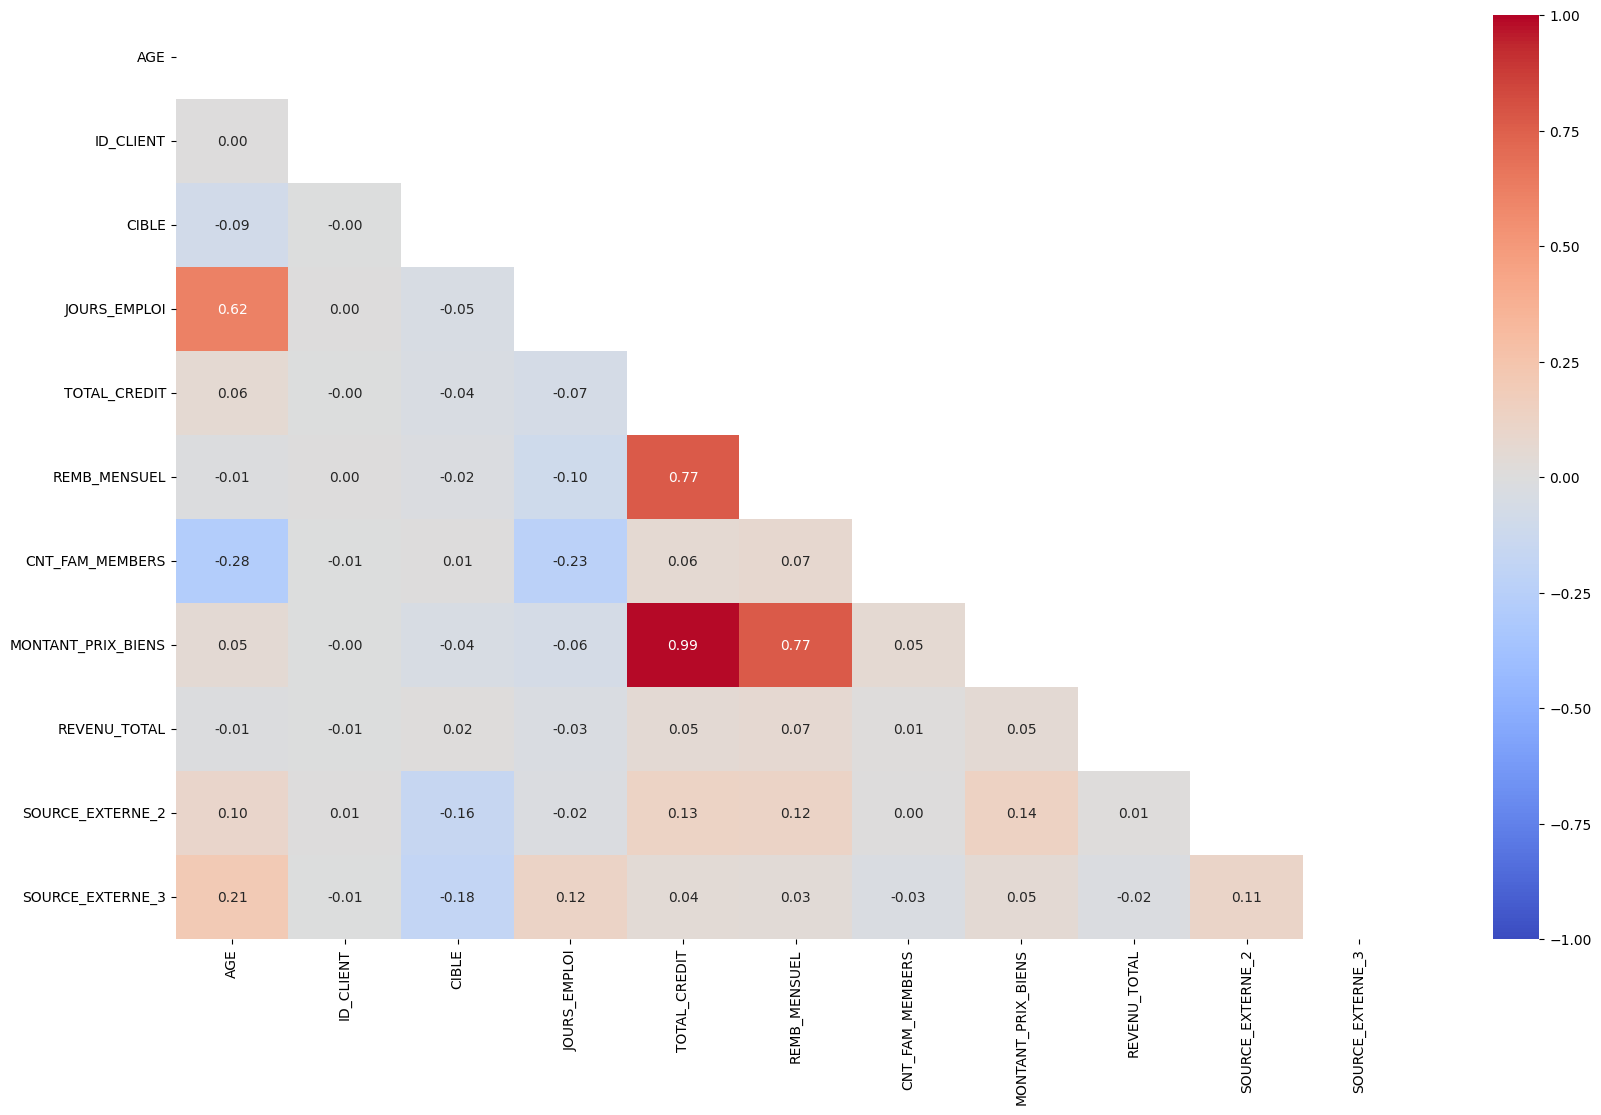

In [7]:
plt.figure(figsize=(20, 12))
corr = df.select_dtypes(include=("float64", "int64")).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask, annot=True)
plt.show()

In [8]:
df = df.sample(frac=0.10)

In [9]:
# df_1 =df.loc[df.CIBLE==1]
# df_1

In [10]:
# n = df_1.shape[0]

In [11]:
# df_0 = df.loc[df.CIBLE==0]
# df_0 = df_0.sample(n)
# df_0

In [12]:
# df = pd.concat([df_0, df_1], axis=0, ignore_index = True)
# df

In [13]:
y = df["CIBLE"]

In [14]:
y.shape

(3075,)

In [15]:
# Dataframe des autres features, supression des targets
x_train = df.copy()

col_cible = ["ID_CLIENT", "CIBLE", "DATE_NAISSANCE"]
x_train.drop(col_cible, axis=1, inplace=True)
x_train

TYPE_CONTRAT  AGE       STATUT_FAMILIAL  JOURS_EMPLOI  TOTAL_CREDIT  \
5847    Cash loans   53                 Widow         -2607       95940.0   
20845   Cash loans   37               Married         -1305     1762110.0   
30295   Cash loans   50               Married          -474     1042560.0   
29360   Cash loans   38               Married         -5710      805536.0   
17463   Cash loans   32  Single / not married          -564      668304.0   
...            ...  ...                   ...           ...           ...   
18420   Cash loans   69                 Widow        365243      178290.0   
17550   Cash loans   48               Married         -1442      629320.5   
4764    Cash loans   45               Married         -3757      501363.0   
2139    Cash loans   61                 Widow        365243      311877.0   
17480   Cash loans   47               Married         -1871      857169.0   

       REMB_MENSUEL PROPRIETAIRE_BIEN_IMMO  CNT_FAM_MEMBERS   TYPE_REVENUS  \
5847         9616.5                      Y              1.0        Working   
20845       48586.5                      N              4.0        Working   
30295       34456.5                      N              2.0        Working   
29360       41260.5                      Y              4.0        Working   
17463       32278.5                      Y              2.0  State servant   
...             ...                    ...              ...            ...   
18420       17496.0                      Y              1.0      Pensioner   
17550       26793.0                      Y              2.0        Working   
4764        25726.5                      N              5.0        Working   
2139        16074.0                      Y              1.0      Pensioner   
17480       25191.0                      Y              2.0  State servant   

      GENRE  MONTANT_PRIX_BIENS               NIVEAU_EDUCATION  REVENU_TOTAL  \
5847      F             90000.0  Secondary / secondary special       45000.0   
20845     M           1575000.0  Secondary / secondary special      247500.0   
30295     M            900000.0  Secondary / secondary special      225000.0   
29360     F            720000.0  Secondary / secondary special      157500.0   
17463     F            540000.0               Higher education      202500.0   
...     ...                 ...                            ...           ...   
18420     F            157500.0  Secondary / secondary special       72000.0   
17550     M            508500.0  Secondary / secondary special      157500.0   
4764      M            418500.0  Secondary / secondary special       76500.0   
2139      F            252000.0  Secondary / secondary special       90000.0   
17480     M            715500.0               Higher education       90000.0   

       SOURCE_EXTERNE_2  SOURCE_EXTERNE_3 PROPRIETAIRE_VOITURE  
5847           0.524883          0.277886                    N  
20845          0.702792          0.558507                    Y  
30295          0.397904          0.612704                    Y  
29360          0.631035          0.352340                    N  
17463          0.547090          0.581484                    N  
...                 ...               ...                  ...  
18420          0.670581          0.792264                    N  
17550          0.428031               NaN                    Y  
4764           0.645018          0.547810                    Y  
2139           0.583097          0.497469                    N  
17480          0.432576          0.083917                    N  

[3075 rows x 16 columns]

In [16]:
x_train.shape

(3075, 16)

In [17]:
categ_col = x_train.select_dtypes(["object"]).columns
num_col = x_train.select_dtypes(["float64", "int64"]).columns

In [18]:
categ_col

Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object')

In [19]:
categ_col.shape

(7,)

In [20]:
num_col

Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='object')

In [21]:
num_col.shape

(9,)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Modélisation</b>
    </h2>
</div>


In [22]:
# Créer les transformateurs
numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")
)


preprocessor_1 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_col),
        ("cat", categorical_transformer, categ_col),
    ],
    remainder="drop",
)


# preprocessor_2 = ColumnTransformer(
# transformers=[
# ("num", numeric_transformer, num_col),
#   ("cat", categorical_transformer, categ_col),],
#  remainder="drop")


pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor_1),
        ("sampler", RandomUnderSampler()),
        ("estimator", RandomForestClassifier()),
    ]
)

In [23]:
def resultize(grid):
    res = pd.DataFrame(grid.cv_results_)  # Utilisez la méthode cv_results_()
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]
    res.sort_values("mean_test_score", ascending=False, inplace=True)
    return res

In [24]:
param_grid = {
    "estimator": [RandomForestClassifier()],  # LogisticRegression(), DummyClassifier(),
    #'preprocessor__num__simpleimputer__strategy': ['mean', 'median'],
    #'preprocessor__cat__simpleimputer__strategy': ['most_frequent', 'constant', 'mean'],
    #'estimator__C': [0.1, 1.0, 10.0]
    "estimator__n_estimators" : [100, 200, 300, 500]
}
param_grid

{'estimator': [RandomForestClassifier()],
 'estimator__n_estimators': [100, 200, 300, 500]}

In [25]:
from sklearn.metrics import get_scorer_names

In [26]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

In [27]:
grid_1 = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    verbose=2,
    scoring="f1",
)
grid_1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='objec...
                                                                         Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'estimator__n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='f1', verbose=2)

In [28]:
print("Pipeline Steps:", pipeline.named_steps)

grid_1.fit(x_train, y)

Pipeline Steps: {'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['TYPE_CONTRAT', 'STATUT

[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=500; total time=   2.3s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='objec...
                                                                         Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'estimator__n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='f1', verbose=2)

In [29]:
resultize(grid_1)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.372364      0.311822         0.038471        0.030817   
2       1.515066      0.718217         0.078164        0.022947   
1       2.731516      3.246983         0.413791        0.753001   
3       2.210172      0.657511         0.642970        1.143653   

            param_estimator param_estimator__n_estimators  \
0  RandomForestClassifier()                           100   
2  RandomForestClassifier()                           300   
1  RandomForestClassifier()                           200   
3  RandomForestClassifier()                           500   

                                              params  mean_test_score  \
0  {'estimator': RandomForestClassifier(), 'estim...         0.224970   
2  {'estimator': RandomForestClassifier(), 'estim...         0.224803   
1  {'estimator': RandomForestClassifier(), 'estim...         0.218326   
3  {'estimator': RandomForestClassifier(), 'estim...         0.212635   

   std_test_score  rank_test_score  mean_train_score  std_train_score  
0        0.012089                1          0.346437         0.017062  
2        0.003909                2          0.353020         0.016128  
1        0.003361                3          0.359292         0.009646  
3        0.016210                4          0.357170         0.019870

In [30]:
y.value_counts(normalize=True)

CIBLE
0    0.917073
1    0.082927
Name: proportion, dtype: float64

In [31]:
best_model = grid_1.best_estimator_

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [33]:
# Séparez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    x_train, y, test_size=0.2, random_state=42
)

In [34]:
# Utilisez GridSearchCV pour ajuster votre modèle
grid_1 = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    verbose=2,
    scoring="f1",
)
grid_1.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=100; total time=   0.6s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=100; total time=   0.6s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=100; total time=   0.7s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=100; total time=   0.7s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=100; total time=   0.7s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=200; total time=   1.2s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=200; total time=   1.3s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=200; total time=   1.2s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=200; total time=   1.3s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=200; total time=   1.4s


[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=300; total time=   1.6s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=300; total time=   1.7s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=300; total time=   1.8s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=300; total time=   1.9s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=300; total time=   2.1s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=500; total time=   2.4s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=500; total time=   2.2s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=500; total time=   2.2s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=500; total time=   2.2s
[CV] END estimator=RandomForestClassifier(), estimator__n_estimators=500; total time=   2.3s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='objec...
                                                                         Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'estimator__n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='f1', verbose=2)

In [35]:
df.columns.tolist()

['TYPE_CONTRAT',
 'AGE',
 'DATE_NAISSANCE',
 'ID_CLIENT',
 'CIBLE',
 'STATUT_FAMILIAL',
 'JOURS_EMPLOI',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'PROPRIETAIRE_BIEN_IMMO',
 'CNT_FAM_MEMBERS',
 'TYPE_REVENUS',
 'GENRE',
 'MONTANT_PRIX_BIENS',
 'NIVEAU_EDUCATION',
 'REVENU_TOTAL',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
 'PROPRIETAIRE_VOITURE']

In [36]:
pipe = grid_1.best_estimator_
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[...eimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])),
                ('sampler', RandomUnderSampler()),
                ('estimator', RandomForestClassifier(n_estimators=300))])

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['AGE', 'JOURS_EMPLOI', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['TYPE_CONTRAT', 'STATUT_FAMILIAL', 'PROPRIETAIRE_BIEN_IMMO',
       'TYPE_REVENUS', 'GENRE', 'NIVEAU_EDUCATION', 'PROPRIETAIRE_VOITURE'],
      dtype='object'))])

In [38]:
# feat_name_out = preprocessor.get_feature_names_out()
# feat_name_out


array(['num__AGE', 'num__JOURS_EMPLOI', 'num__TOTAL_CREDIT',
       'num__REMB_MENSUEL', 'num__CNT_FAM_MEMBERS',
       'num__MONTANT_PRIX_BIENS', 'num__REVENU_TOTAL',
       'num__SOURCE_EXTERNE_2', 'num__SOURCE_EXTERNE_3',
       'cat__TYPE_CONTRAT_Cash loans',
       'cat__TYPE_CONTRAT_Revolving loans',
       'cat__STATUT_FAMILIAL_Civil marriage',
       'cat__STATUT_FAMILIAL_Married', 'cat__STATUT_FAMILIAL_Separated',
       'cat__STATUT_FAMILIAL_Single / not married',
       'cat__STATUT_FAMILIAL_Widow', 'cat__PROPRIETAIRE_BIEN_IMMO_N',
       'cat__PROPRIETAIRE_BIEN_IMMO_Y',
       'cat__TYPE_REVENUS_Commercial associate',
       'cat__TYPE_REVENUS_Pensioner', 'cat__TYPE_REVENUS_State servant',
       'cat__TYPE_REVENUS_Working', 'cat__GENRE_F', 'cat__GENRE_M',
       'cat__NIVEAU_EDUCATION_Higher education',
       'cat__NIVEAU_EDUCATION_Incomplete higher',
       'cat__NIVEAU_EDUCATION_Lower secondary',
       'cat__NIVEAU_EDUCATION_Secondary / secondary special',
       'cat_

In [39]:
len(feat_name_out)

30

In [40]:
est = pipe.steps[-1]
est = est[1]
est

RandomForestClassifier(n_estimators=300)

In [41]:
feat_imp = est.feature_importances_
feat_imp 

array([0.08340741, 0.09948117, 0.08102018, 0.08481231, 0.03773293,
       0.07368435, 0.0676608 , 0.12051691, 0.12784735, 0.0069274 ,
       0.00677677, 0.00918094, 0.01213543, 0.00892384, 0.01033034,
       0.00566497, 0.01394664, 0.01354935, 0.0122475 , 0.00687237,
       0.0069534 , 0.01946726, 0.01413366, 0.01403559, 0.01697776,
       0.00302374, 0.00119638, 0.01610486, 0.01322612, 0.01216226])

In [42]:
len(est.feature_importances_)

30

In [43]:
feature_imp_dict = {k: v for k, v in zip(feat_name_out, feat_imp)}
feature_imp_dict

{'num__AGE': 0.08340741463312723,
 'num__JOURS_EMPLOI': 0.09948116898073196,
 'num__TOTAL_CREDIT': 0.08102017812639978,
 'num__REMB_MENSUEL': 0.08481230718073479,
 'num__CNT_FAM_MEMBERS': 0.03773292500230574,
 'num__MONTANT_PRIX_BIENS': 0.07368434855134827,
 'num__REVENU_TOTAL': 0.06766080372624189,
 'num__SOURCE_EXTERNE_2': 0.1205169100381227,
 'num__SOURCE_EXTERNE_3': 0.12784735419700474,
 'cat__TYPE_CONTRAT_Cash loans': 0.006927402530241782,
 'cat__TYPE_CONTRAT_Revolving loans': 0.006776770514649596,
 'cat__STATUT_FAMILIAL_Civil marriage': 0.009180939842143772,
 'cat__STATUT_FAMILIAL_Married': 0.012135434018365547,
 'cat__STATUT_FAMILIAL_Separated': 0.00892383758382701,
 'cat__STATUT_FAMILIAL_Single / not married': 0.010330340781267839,
 'cat__STATUT_FAMILIAL_Widow': 0.005664974849965326,
 'cat__PROPRIETAIRE_BIEN_IMMO_N': 0.013946640165163858,
 'cat__PROPRIETAIRE_BIEN_IMMO_Y': 0.013549345115572538,
 'cat__TYPE_REVENUS_Commercial associate': 0.012247495949275933,
 'cat__TYPE_REVENUS_

In [100]:
feature_imp_ser = pd.Series(feature_imp_dict)
feature_imp_ser = feature_imp_ser.sort_values(ascending=False)
feature_imp_ser = feature_imp_ser[feature_imp_ser > 0.01]
feature_imp_ser = feature_imp_ser.round(4)

feature_imp_ser

num__SOURCE_EXTERNE_3                                  0.1278
num__SOURCE_EXTERNE_2                                  0.1205
num__JOURS_EMPLOI                                      0.0995
num__REMB_MENSUEL                                      0.0848
num__AGE                                               0.0834
num__TOTAL_CREDIT                                      0.0810
num__MONTANT_PRIX_BIENS                                0.0737
num__REVENU_TOTAL                                      0.0677
num__CNT_FAM_MEMBERS                                   0.0377
cat__TYPE_REVENUS_Working                              0.0195
cat__NIVEAU_EDUCATION_Higher education                 0.0170
cat__NIVEAU_EDUCATION_Secondary / secondary special    0.0161
cat__GENRE_F                                           0.0141
cat__GENRE_M                                           0.0140
cat__PROPRIETAIRE_BIEN_IMMO_N                          0.0139
cat__PROPRIETAIRE_BIEN_IMMO_Y                          0.0135
cat__PRO

In [102]:
with open("feat_importance.pk", "wb") as f : 
    pk.dump(feature_imp_ser, f)

In [46]:
def build_x_train_preprocessor(pipe, x_train):

    preprocessor = pipe.steps[0]
    preprocessor = preprocessor[1]
    preprocessor

    feat_name_out = preprocessor.get_feature_names_out()
    feat_name_out

    x_train_after_preprocess = preprocessor.transform(x_train)
    x_train_after_preprocess

    x_train_after_preprocess = pd.DataFrame(x_train_after_preprocess, columns=feat_name_out)

    return    x_train_after_preprocess

num__AGE  num__JOURS_EMPLOI  num__TOTAL_CREDIT  num__REMB_MENSUEL  \
0     0.737447          -0.482089          -1.249056          -1.256192   
1    -0.588058          -0.473023           2.998033           1.589696   
2     0.488915          -0.467237           1.163891           0.557815   
3    -0.505214          -0.503697           0.559714           1.054696   
4    -1.002279          -0.467864           0.209907           0.398761   
...        ...                ...                ...                ...   
3070  2.062953           2.079354          -1.039144          -0.680770   
3071  0.323227          -0.473977           0.110538          -0.001832   
3072  0.074694          -0.490097          -0.215627          -0.079716   
3073  1.400200           2.079354          -0.698629          -0.784615   
3074  0.240383          -0.476965           0.691327          -0.118822   

      num__CNT_FAM_MEMBERS  num__MONTANT_PRIX_BIENS  num__REVENU_TOTAL  \
0                -1.268610                -1.212883          -1.400599   
1                 1.988989                 2.921959           0.948667   
2                -0.182743                 1.042486           0.687637   
3                 1.988989                 0.541292          -0.095451   
4                -0.182743                 0.040099           0.426608   
...                    ...                      ...                ...   
3070             -1.268610                -1.024936          -1.087364   
3071             -0.182743                -0.047609          -0.095451   
3072              3.074856                -0.298206          -1.035158   
3073             -1.268610                -0.761809          -0.878540   
3074             -0.182743                 0.528763          -0.878540   

      num__SOURCE_EXTERNE_2  num__SOURCE_EXTERNE_3  \
0                  0.042593              -1.335157   
1                  0.993220               0.292201   
2                 -0.635901               0.606500   
3                  0.609800              -0.903387   
4                  0.161255               0.425448   
...                     ...                    ...   
3070               0.821106               1.647793   
3071              -0.474922               0.000000   
3072               0.684515               0.230172   
3073               0.353650              -0.061765   
3074              -0.450633              -2.460006   

      cat__TYPE_CONTRAT_Cash loans  ...  cat__TYPE_REVENUS_State servant  \
0                              1.0  ...                              0.0   
1                              1.0  ...                              0.0   
2                              1.0  ...                              0.0   
3                              1.0  ...                              0.0   
4                              1.0  ...                              1.0   
...                            ...  ...                              ...   
3070                           1.0  ...                              0.0   
3071                           1.0  ...                              0.0   
3072                           1.0  ...                              0.0   
3073                           1.0  ...                              0.0   
3074                           1.0  ...                              1.0   

      cat__TYPE_REVENUS_Working  cat__GENRE_F  cat__GENRE_M  \
0                           1.0           1.0           0.0   
1                           1.0           0.0           1.0   
2                           1.0           0.0           1.0   
3                           1.0           1.0           0.0   
4                           0.0           1.0           0.0   
...                         ...           ...           ...   
3070                        0.0           1.0           0.0   
3071                        1.0           0.0           1.0   
3072                        1.0           0.0           1.0   
3073                    

In [47]:
def build_x_train_preprocessor(pipe, x_train):

    preprocessor = pipe.steps[0]
    preprocessor = preprocessor[1]
    preprocessor

    feat_name_out = preprocessor.get_feature_names_out()
    feat_name_out

    x_train_after_preprocess = preprocessor.transform(x_train)
    x_train_after_preprocess

    x_train_after_preprocess = pd.DataFrame(
        x_train_after_preprocess, columns=feat_name_out
    )

    return x_train_after_preprocess



def extract_est(pipe) : 

    return pipe.steps[-1][1]


explainer = shap.TreeExplainer(est, x_train_after_preprocess)
explainer

In [81]:
import pickle as pk

with open("shap_explainer.pk", "wb") as f:

    pk.dump(explainer, f)

In [86]:
[i for i in explainer.__dir__() if "__" not in i]

['data_feature_names',
 'model',
 'output_names',
 'feature_names',
 'masker',
 'link',
 'linearize_link',
 'data',
 'data_missing',
 'feature_perturbation',
 'expected_value',
 'model_output',
 'approximate',
 '_validate_inputs',
 'shap_values',
 '_get_shap_output',
 'shap_interaction_values',
 '_get_shap_interactions_output',
 'assert_additivity',
 'supports_model_with_masker',
 'explain_row',
 '_compute_main_effects',
 'save',
 'load',
 '_instantiated_load']

In [ ]:

def build_x_train_preprocessor(pipe, x_train):

    # attenrtion pas la grid mais grid.best_estimatorç_
    
    preprocessor = pipe.steps[0]
    preprocessor = preprocessor[1]
    preprocessor

    feat_name_out = preprocessor.get_feature_names_out()
    feat_name_out

    x_train_after_preprocess = preprocessor.transform(x_train)
    x_train_after_preprocess

    x_train_after_preprocess = pd.DataFrame(x_train_after_preprocess, columns=feat_name_out)

    return    x_train_after_preprocess

In [99]:
def shapeit(i, explainer, x_train_after_preprocess):

    """trake x_train_after_preprocess and i and give back shap values"""
    val_ = explainer.shap_values(x_train_after_preprocess.iloc[i])
    val_ = pd.DataFrame(
        val_, index=x_train_after_preprocess.columns, columns=["TRUE", "FALSE"]
    )
    val_ = val_.iloc[:, 0].sort_values(ascending=False).head(15)

    return val_.round(4).to_dict()

{'num__JOURS_EMPLOI': 0.0763,
 'num__MONTANT_PRIX_BIENS': 0.0442,
 'num__SOURCE_EXTERNE_2': 0.0352,
 'num__TOTAL_CREDIT': 0.0201,
 'cat__PROPRIETAIRE_BIEN_IMMO_N': 0.0089,
 'num__REVENU_TOTAL': 0.0075,
 'cat__STATUT_FAMILIAL_Married': 0.0037,
 'cat__PROPRIETAIRE_BIEN_IMMO_Y': 0.0036,
 'cat__GENRE_F': 0.0034,
 'cat__GENRE_M': 0.0034,
 'cat__STATUT_FAMILIAL_Separated': 0.0021,
 'cat__STATUT_FAMILIAL_Widow': 0.0017,
 'cat__STATUT_FAMILIAL_Civil marriage': 0.0006,
 'cat__NIVEAU_EDUCATION_Incomplete higher': 0.0002,
 'cat__NIVEAU_EDUCATION_Lower secondary': 0.0001}

In [48]:
explainer.__dict__.keys()

dict_keys(['data_feature_names', 'model', 'output_names', 'feature_names', 'masker', 'link', 'linearize_link', 'data', 'data_missing', 'feature_perturbation', 'expected_value', 'model_output', 'approximate'])

In [49]:
x_train_after_preprocess.iloc[:100]

num__AGE  num__JOURS_EMPLOI  num__TOTAL_CREDIT  num__REMB_MENSUEL  \
0   0.737447          -0.482089          -1.249056          -1.256192   
1  -0.588058          -0.473023           2.998033           1.589696   
2   0.488915          -0.467237           1.163891           0.557815   
3  -0.505214          -0.503697           0.559714           1.054696   
4  -1.002279          -0.467864           0.209907           0.398761   
..       ...                ...                ...                ...   
95 -0.836591          -0.467286           0.155399          -0.659410   
96  1.068824           2.079354           2.291676           0.911744   
97  0.903135          -0.547203          -0.862727          -0.690957   
98 -0.670903          -0.504602          -0.575963          -0.449419   
99  0.903135          -0.465043           0.777746           0.631756   

    num__CNT_FAM_MEMBERS  num__MONTANT_PRIX_BIENS  num__REVENU_TOTAL  \
0              -1.268610                -1.212883          -1.400599   
1               1.988989                 2.921959           0.948667   
2              -0.182743                 1.042486           0.687637   
3               1.988989                 0.541292          -0.095451   
4              -0.182743                 0.040099           0.426608   
..                   ...                      ...                ...   
95             -0.182743                 0.040099           0.165578   
96             -0.182743                 2.671363           0.165578   
97             -0.182743                -0.774339          -0.356481   
98             -1.268610                -0.461094          -0.617511   
99             -0.182743                 0.541292           2.253815   

    num__SOURCE_EXTERNE_2  num__SOURCE_EXTERNE_3  \
0                0.042593              -1.335157   
1                0.993220               0.292201   
2               -0.635901               0.606500   
3                0.609800              -0.903387   
4                0.161255               0.425448   
..                    ...                    ...   
95              -1.052874              -0.708683   
96               0.192227               0.105401   
97               0.744774              -0.865047   
98              -1.429185               1.435983   
99               0.464952               0.000000   

    cat__TYPE_CONTRAT_Cash loans  ...  cat__TYPE_REVENUS_State servant  \
0                            1.0  ...                              0.0   
1                            1.0  ...                              0.0   
2                            1.0  ...                              0.0   
3                            1.0  ...                              0.0   
4                            1.0  ...                              1.0   
..                           ...  ...                              ...   
95                           1.0  ...                              1.0   
96                           1.0  ...                              0.0   
97                           1.0  ...                              0.0   
98                           1.0  ...                              0.0   
99                           1.0  ...                              0.0   

    cat__TYPE_REVENUS_Working  cat__GENRE_F  cat__GENRE_M  \
0                         1.0           1.0           0.0   
1                         1.0           0.0           1.0   
2                         1.0           0.0           1.0   
3                         1.0           1.0           0.0   
4                         0.0           1.0           0.0   
..                        ...           ...           ...   
95                        0.0           0.0           1.0   
96                        0.0           1.0           0.0   
97                        1.0           1.0           0.0   
98                        1.0           1.0           0.0   
99                        0.0           0.0           1.0   

    cat__NIVEAU

In [74]:
shap_values = explainer(x_train_after_preprocess, check_additivity=False)
shap_values

100%|===================| 6139/6150 [05:31<00:00]        

.values =
array([[[ 0.01261583, -0.01261583],
        [-0.00268774,  0.00268774],
        [ 0.00452226, -0.00452226],
        ...,
        [-0.01224397,  0.01224397],
        [ 0.00030274, -0.00030274],
        [-0.0011241 ,  0.0011241 ]],

       [[-0.0144675 ,  0.0144675 ],
        [-0.02688806,  0.02688806],
        [-0.00163576,  0.00163575],
        ...,
        [-0.00447372,  0.00447372],
        [ 0.01756186, -0.01756186],
        [ 0.01104479, -0.01104479]],

       [[ 0.01610338, -0.01610338],
        [-0.02266455,  0.02266455],
        [-0.0008787 ,  0.0008787 ],
        ...,
        [-0.00800528,  0.00800528],
        [ 0.00866159, -0.00866159],
        [ 0.01170588, -0.01170588]],

       ...,

       [[ 0.00930107, -0.00930107],
        [ 0.00968917, -0.00968917],
        [-0.00877303,  0.00877303],
        ...,
        [-0.004115  ,  0.004115  ],
        [ 0.01240402, -0.01240402],
        [ 0.00944488, -0.00944488]],

       [[ 0.03903255, -0.03903255],
        [ 0.01134

In [79]:
import pickle as pk

with open("shap.pk", "wb") as f : 

    pk.dump(shap_values, f)

In [57]:
x_train_after_preprocess.iloc[6131, :]

IndexError: single positional indexer is out-of-bounds

In [61]:
x_train_after_preprocess.isna().sum().sum()

0

In [62]:
3075*2

6150

In [64]:
6131/2

3065.5

In [68]:
x_train_after_preprocess.iloc[3063].to_dict()

{'num__AGE': -0.5052143518859049,
 'num__JOURS_EMPLOI': -0.48551542655233076,
 'num__TOTAL_CREDIT': 0.8005034553962733,
 'num__REMB_MENSUEL': 0.4023760513445378,
 'num__CNT_FAM_MEMBERS': -0.18274336434361763,
 'num__MONTANT_PRIX_BIENS': 1.0424855106886945,
 'num__REVENU_TOTAL': -0.35648100737390137,
 'num__SOURCE_EXTERNE_2': 0.42575751838970194,
 'num__SOURCE_EXTERNE_3': 0.6362022543405941,
 'cat__TYPE_CONTRAT_Cash loans': 1.0,
 'cat__TYPE_CONTRAT_Revolving loans': 0.0,
 'cat__STATUT_FAMILIAL_Civil marriage': 0.0,
 'cat__STATUT_FAMILIAL_Married': 1.0,
 'cat__STATUT_FAMILIAL_Separated': 0.0,
 'cat__STATUT_FAMILIAL_Single / not married': 0.0,
 'cat__STATUT_FAMILIAL_Widow': 0.0,
 'cat__PROPRIETAIRE_BIEN_IMMO_N': 1.0,
 'cat__PROPRIETAIRE_BIEN_IMMO_Y': 0.0,
 'cat__TYPE_REVENUS_Commercial associate': 0.0,
 'cat__TYPE_REVENUS_Pensioner': 0.0,
 'cat__TYPE_REVENUS_State servant': 0.0,
 'cat__TYPE_REVENUS_Working': 1.0,
 'cat__GENRE_F': 1.0,
 'cat__GENRE_M': 0.0,
 'cat__NIVEAU_EDUCATION_Higher e

In [69]:
x_train_after_preprocess.iloc[3064].to_dict()

{'num__AGE': 1.3173560203354764,
 'num__JOURS_EMPLOI': 2.0793540179736856,
 'num__TOTAL_CREDIT': -0.7294852756408765,
 'num__REMB_MENSUEL': -0.6922719708203315,
 'num__CNT_FAM_MEMBERS': -1.268609732182504,
 'num__MONTANT_PRIX_BIENS': -0.7743392674440154,
 'num__REVENU_TOTAL': -0.35648100737390137,
 'num__SOURCE_EXTERNE_2': 1.0021629323004406,
 'num__SOURCE_EXTERNE_3': 0.0,
 'cat__TYPE_CONTRAT_Cash loans': 1.0,
 'cat__TYPE_CONTRAT_Revolving loans': 0.0,
 'cat__STATUT_FAMILIAL_Civil marriage': 0.0,
 'cat__STATUT_FAMILIAL_Married': 0.0,
 'cat__STATUT_FAMILIAL_Separated': 1.0,
 'cat__STATUT_FAMILIAL_Single / not married': 0.0,
 'cat__STATUT_FAMILIAL_Widow': 0.0,
 'cat__PROPRIETAIRE_BIEN_IMMO_N': 0.0,
 'cat__PROPRIETAIRE_BIEN_IMMO_Y': 1.0,
 'cat__TYPE_REVENUS_Commercial associate': 0.0,
 'cat__TYPE_REVENUS_Pensioner': 1.0,
 'cat__TYPE_REVENUS_State servant': 0.0,
 'cat__TYPE_REVENUS_Working': 0.0,
 'cat__GENRE_F': 1.0,
 'cat__GENRE_M': 0.0,
 'cat__NIVEAU_EDUCATION_Higher education': 0.0,
 '

In [70]:
x_train_after_preprocess.iloc[3065].to_dict()

{'num__AGE': -0.6709025675423942,
 'num__JOURS_EMPLOI': -0.46953469295369904,
 'num__TOTAL_CREDIT': 1.9475591225206286,
 'num__REMB_MENSUEL': 1.7047147219657859,
 'num__CNT_FAM_MEMBERS': 0.9031230034952688,
 'num__MONTANT_PRIX_BIENS': 2.2954681162974597,
 'num__REVENU_TOTAL': 1.2096963709895532,
 'num__SOURCE_EXTERNE_2': 0.22041464718354364,
 'num__SOURCE_EXTERNE_3': 0.39485804973236605,
 'cat__TYPE_CONTRAT_Cash loans': 1.0,
 'cat__TYPE_CONTRAT_Revolving loans': 0.0,
 'cat__STATUT_FAMILIAL_Civil marriage': 1.0,
 'cat__STATUT_FAMILIAL_Married': 0.0,
 'cat__STATUT_FAMILIAL_Separated': 0.0,
 'cat__STATUT_FAMILIAL_Single / not married': 0.0,
 'cat__STATUT_FAMILIAL_Widow': 0.0,
 'cat__PROPRIETAIRE_BIEN_IMMO_N': 1.0,
 'cat__PROPRIETAIRE_BIEN_IMMO_Y': 0.0,
 'cat__TYPE_REVENUS_Commercial associate': 1.0,
 'cat__TYPE_REVENUS_Pensioner': 0.0,
 'cat__TYPE_REVENUS_State servant': 0.0,
 'cat__TYPE_REVENUS_Working': 0.0,
 'cat__GENRE_F': 1.0,
 'cat__GENRE_M': 0.0,
 'cat__NIVEAU_EDUCATION_Higher educ

In [71]:
x_train_after_preprocess.iloc[3066].to_dict()

{'num__AGE': 0.5717590498812749,
 'num__JOURS_EMPLOI': -0.48617693840064014,
 'num__TOTAL_CREDIT': -0.18835029411829074,
 'num__REMB_MENSUEL': -0.13032417199057275,
 'num__CNT_FAM_MEMBERS': 1.988989371334155,
 'num__MONTANT_PRIX_BIENS': -0.461093616041824,
 'num__REVENU_TOTAL': -0.6175105704344771,
 'num__SOURCE_EXTERNE_2': 0.11099671884430516,
 'num__SOURCE_EXTERNE_3': 1.5558498087743775,
 'cat__TYPE_CONTRAT_Cash loans': 1.0,
 'cat__TYPE_CONTRAT_Revolving loans': 0.0,
 'cat__STATUT_FAMILIAL_Civil marriage': 0.0,
 'cat__STATUT_FAMILIAL_Married': 1.0,
 'cat__STATUT_FAMILIAL_Separated': 0.0,
 'cat__STATUT_FAMILIAL_Single / not married': 0.0,
 'cat__STATUT_FAMILIAL_Widow': 0.0,
 'cat__PROPRIETAIRE_BIEN_IMMO_N': 0.0,
 'cat__PROPRIETAIRE_BIEN_IMMO_Y': 1.0,
 'cat__TYPE_REVENUS_Commercial associate': 0.0,
 'cat__TYPE_REVENUS_Pensioner': 0.0,
 'cat__TYPE_REVENUS_State servant': 0.0,
 'cat__TYPE_REVENUS_Working': 1.0,
 'cat__GENRE_F': 0.0,
 'cat__GENRE_M': 1.0,
 'cat__NIVEAU_EDUCATION_Higher ed



shap.force_plot(
    explainer.expected_value, shap_values.values[1, :], X_display.iloc[0, :]
)



In [72]:
shap.force_plot(
    explainer.expected_value,
    shap_values.values[:1000, :],
    x_train_after_preprocess.iloc[:1000, :],
)

NameError: name 'shap_values' is not defined

In [ ]:
x_train

TYPE_CONTRAT  AGE STATUT_FAMILIAL  JOURS_EMPLOI  TOTAL_CREDIT  \
21617       Cash loans   58       Separated          -801      621000.0   
28332       Cash loans   40         Married         -1169      262246.5   
26754  Revolving loans   22         Married          -452      180000.0   
4789        Cash loans   29         Married          -201      592560.0   
10059       Cash loans   37         Married         -4779      450000.0   
...                ...  ...             ...           ...           ...   
11476       Cash loans   58         Married        365243      422892.0   
10749       Cash loans   60         Married        365243       95940.0   
24042       Cash loans   37         Married         -2547      913500.0   
20033  Revolving loans   25  Civil marriage          -404      180000.0   
15458       Cash loans   49         Married         -3022      284400.0   

       REMB_MENSUEL PROPRIETAIRE_BIEN_IMMO  CNT_FAM_MEMBERS  \
21617       22815.0                      Y              1.0   
28332       31252.5                      Y              2.0   
26754        9000.0                      Y              2.0   
4789        22090.5                      N              2.0   
10059       21109.5                      Y              4.0   
...             ...                    ...              ...   
11476       24408.0                      N              2.0   
10749        9472.5                      Y              2.0   
24042       30321.0                      Y              3.0   
20033        9000.0                      Y              2.0   
15458       16456.5                      Y              3.0   

               TYPE_REVENUS GENRE  MONTANT_PRIX_BIENS  \
21617               Working     F            621000.0   
28332  Commercial associate     F            243000.0   
26754               Working     F            180000.0   
4789                Working     M            450000.0   
10059  Commercial associate     M            450000.0   
...                     ...   ...                 ...   
11476             Pensioner     F            382500.0   
10749             Pensioner     F             90000.0   
24042  Commercial associate     M            913500.0   
20033  Commercial associate     F            180000.0   
15458         State servant     M            225000.0   

                    NIVEAU_EDUCATION  REVENU_TOTAL  SOURCE_EXTERNE_2  \
21617  Secondary / secondary special      292500.0          0.140932   
28332               Higher education      202500.0          0.697314   
26754  Secondary / secondary special      135000.0          0.636056   
4789                Higher education      157500.0          0.090944   
10059  Secondary / secondary special      157500.0          0.670885   
...                              ...           ...               ...   
11476  Secondary / secondary special      112500.0          0.599530   
10749  Secondary / secondary special       67500.0          0.265256   
24042  Secondary / secondary special      180000.0          0.329751   
20033              Incomplete higher      315000.0          0.661216   
15458               Higher education       90000.0          0.356178   

       SOURCE_EXTERNE_3 PROPRIETAIRE_VOITURE  
21617          0.068251                    N  
28332          0.355639                    N  
26754               NaN                    N  
4789           0.432962                    Y  
10059               NaN                    Y  
...                 ...                  ...  
11476          0.680139                    N  
10749          0.698668                    N  
24042          0.049263                    Y  
20033          0.415347                    N  
15458               NaN                    N  

[3075 rows x 16 columns]

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>First Approch</b>
    </h2>
</div>


In [ ]:
# y_pred = notre prediction finale 'oui ou non'
# y_true = CIBLE

In [ ]:
# def calcul_benef(total_credit, y_true, y_pred, taux_interet=0.04):
#    'on accorde un crédit, ou on refuse'
#    if y_pred : #cas où on refuse le crédit
#        return 0
#    else :
#        if y_true  :#On accorde le crédit donc on fait un bénéfice
#            total_credit * taux_interet
#            return total_credit * taux_interet
#        if  y_true ==1 :
#             return -total_credit *0.25 #On met un - car on a perdu le crédit accordé non remboursé


def calcul_benef(montant, y_true, y_pred, taux=0.04, default_rate=1):
    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [ ]:
calcul_benef(1000, 0, 0)

40.0

In [ ]:
calcul_benef(1000, 1, 0)

-1000

In [ ]:
calcul_benef(1000, 1, 1)

0

In [ ]:
def calcul_benef_bis(row, taux_interet=0.04):
    if row["CIBLE"] == 1:  # cas où on refuse le crédit
        return pd.Series(
            {"benef": 0, "pertes": -row["TOTAL_CREDIT"] * 0.25}
        )  # Pertes avec un signe négatif
    else:
        if row["CIBLE"] == 0:  # On accorde le crédit donc on fait un bénéfice
            benef = row["TOTAL_CREDIT"] * taux_interet
            return pd.Series({"benef": benef, "pertes": 0})
        else:
            pertes = (
                -row["TOTAL_CREDIT"] * 0.25
            )  # On met un - car on a perdu le crédit accordé non remboursé
            return pd.Series({"benef": 0, "pertes": pertes})

In [ ]:
df[["benef", "pertes"]] = df.apply(calcul_benef_bis, axis=1)

In [ ]:
df[["TOTAL_CREDIT", "CIBLE", "benef", "pertes"]]

TOTAL_CREDIT  CIBLE     benef  pertes
21617      621000.0      0  24840.00     0.0
28332      262246.5      0  10489.86     0.0
26754      180000.0      0   7200.00     0.0
4789       592560.0      0  23702.40     0.0
10059      450000.0      0  18000.00     0.0
...             ...    ...       ...     ...
11476      422892.0      0  16915.68     0.0
10749       95940.0      0   3837.60     0.0
24042      913500.0      0  36540.00     0.0
20033      180000.0      0   7200.00     0.0
15458      284400.0      0  11376.00     0.0

[3075 rows x 4 columns]

In [ ]:
y_pred_list = grid_1.predict(X_test)
y_pred_list

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [ ]:
y_true_list = y_test.values
y_true_list

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
montant_list = X_test.loc[:, "TOTAL_CREDIT"].values
montant_list

array([ 755190. ,  314100. ,  454500. ,  148707. ,  288873. ,  630000. ,
        450000. ,  966555. ,  405000. ,  521280. ,  319981.5,  573628.5,
       1078200. ,  729792. ,  270000. ,  502497. ,  343800. ,  276277.5,
       1546020. ,  219042. ,  941472. , 1185282. ,  275076. ,  473760. ,
        191880. ,  354469.5, 1343601. ,  163201.5,  990000. ,  314055. ,
       2085120. ,  762768. , 2156400. ,  225171. ,  180000. ,  970380. ,
       1013508. ,  123993. ,  495000. , 1483231.5,  956574. ,  450000. ,
        254700. ,   90000. ,  808650. ,  432000. ,  180000. ,  557770.5,
        144000. ,  382500. ,  135000. ,  480060. ,  225000. ,  188685. ,
        270000. ,  450000. ,  536917.5,  540000. ,  135000. ,  814041. ,
        203760. , 1267735.5,  808650. ,  157500. ,  592560. ,  835380. ,
        270000. , 1071909. ,  180000. ,  533668.5,  900000. ,  202500. ,
        163098. , 1243836. , 1039702.5, 1354500. ,  318528. ,  640080. ,
       1318500. ,  808650. ,  983299.5,  180000. , 

In [ ]:
l1 = ["a", "b"]
l2 = [0, 1]

In [ ]:
v = 0
for m, y_true, y_pred in zip(montant_list, y_true_list, y_pred_list):
    v += calcul_benef(m, y_true=y_true, y_pred=y_pred)
round(v / 1_000_000, 2)

4.03

In [ ]:
sum(montant_list / 1_000_000).round(2)

360.47

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Prédict Proba</b>
    </h2>
</div>


In [ ]:
X_test

TYPE_CONTRAT  AGE       STATUT_FAMILIAL  JOURS_EMPLOI  TOTAL_CREDIT  \
1109        Cash loans   44        Civil marriage          -596      755190.0   
8844        Cash loans   30  Single / not married         -1173      314100.0   
5254        Cash loans   40  Single / not married         -5565      454500.0   
19730       Cash loans   63                 Widow        365243      148707.0   
13598       Cash loans   37               Married         -2519      288873.0   
...                ...  ...                   ...           ...           ...   
5809   Revolving loans   34               Married         -4636      180000.0   
667         Cash loans   35        Civil marriage         -2170      393219.0   
23700       Cash loans   49        Civil marriage         -1855      239850.0   
28800       Cash loans   53        Civil marriage         -3101     1984500.0   
4229        Cash loans   58        Civil marriage        365243      269550.0   

       REMB_MENSUEL PROPRIETAIRE_BIEN_IMMO  CNT_FAM_MEMBERS  \
1109        32125.5                      Y              3.0   
8844        16164.0                      Y              1.0   
5254        25506.0                      Y              1.0   
19730       14485.5                      Y              1.0   
13598       16713.0                      N              2.0   
...             ...                    ...              ...   
5809         9000.0                      N              6.0   
667         42480.0                      N              3.0   
23700       25447.5                      N              2.0   
28800       52348.5                      N              2.0   
4229        13095.0                      Y              2.0   

               TYPE_REVENUS GENRE  MONTANT_PRIX_BIENS  \
1109                Working     F            675000.0   
8844                Working     M            225000.0   
5254                Working     F            454500.0   
19730             Pensioner     F            139500.0   
13598         State servant     F            238500.0   
...                     ...   ...                 ...   
5809                Working     M            180000.0   
667    Commercial associate     M            373500.0   
23700               Working     F            225000.0   
28800  Commercial associate     F           1984500.0   
4229              Pensioner     F            225000.0   

                    NIVEAU_EDUCATION  REVENU_TOTAL  SOURCE_EXTERNE_2  \
1109   Secondary / secondary special      112500.0          0.607885   
8844   Secondary / secondary special       90000.0          0.225298   
5254   Secondary / secondary special      112500.0          0.285898   
19730  Secondary / secondary special       54000.0          0.370059   
13598  Secondary / secondary special      112500.0          0.442899   
...                              ...           ...               ...   
5809   Secondary / secondary special       45000.0          0.499450   
667                 Higher education      450000.0          0.762522   
23700              Incomplete higher      270000.0          0.353825   
28800  Secondary / secondary special      310500.0          0.637179   
4229   Secondary / secondary special       72000.0          0.062779   

       SOURCE_EXTERNE_3 PROPRIETAIRE_VOITURE  
1109                NaN                    N  
8844           0.652897                    Y  
5254           0.477649                    Y  
19730               NaN                    N  
13598          0.190706                    Y  
...                 ...                  ...  
5809                NaN                    Y  
667            0.531686                    Y  
23700          0.245851                    N  
28800          0.309275                    Y  
4229           0.718033                    N  

[615 rows x 16 columns]

In [ ]:
y_pred_proba_list = grid_1.predict_proba(X_test)
y_pred_proba_list = list(y_pred_proba_list[:, 0])
y_pred_proba_list = [round(x, 4) for x in y_pred_proba_list]
y_pred_proba_list[:10]

[0.6516, 0.2159, 0.267, 0.5784, 0.2535, 0.2537, 0.4731, 0.8429, 0.4186, 0.7489]

In [ ]:
def calcul_pnl_one_complexe(
    montant,
    y_true,
    y_pred_proba,
    taux=0.04,
    default_rate=1,
    threshold=0.5,
):
    y_pred = 0 if y_pred_proba > threshold else 1

    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba)
round(v / 1_000_000, 2)

4.03

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=0.0
    )
round(v / 1_000_000, 2)

-11.88

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=1
    )
round(v / 1_000_000, 2)

0.0

In [ ]:
threshold_list = np.linspace(0, 1, 100)
pnl_list = []

taux = 0.04
default_rate = 1
for threshold in threshold_list:
    v = 0
    for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
        v += calcul_pnl_one_complexe(
            m,
            y_true=y_true,
            y_pred_proba=y_pred_proba,
            threshold=threshold,
            default_rate=default_rate,
            taux=taux,
        )
    pnl_list.append(v)

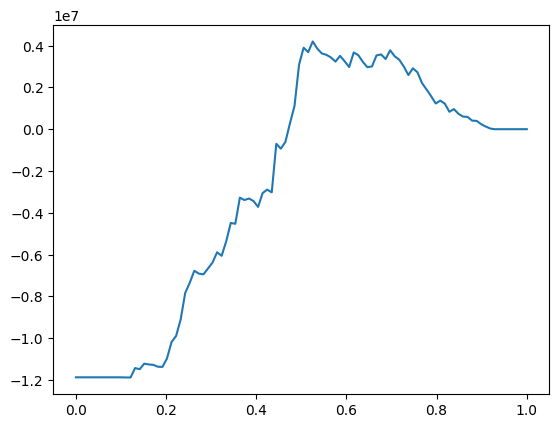

In [ ]:
plt.plot(threshold_list, pnl_list)

In [ ]:
px.line(x=threshold_list, y=pnl_list)

In [ ]:
pnl_df = pd.DataFrame({"threshold": threshold_list, "pnl": pnl_list}).sort_values(
    by="pnl", ascending=False
)
pnl_df

threshold          pnl
52   0.525253   4199620.32
50   0.505051   3900582.54
53   0.535354   3858232.50
69   0.696970   3777917.94
51   0.515152   3689462.16
..        ...          ...
9    0.090909 -11878977.42
10   0.101010 -11878977.42
0    0.000000 -11878977.42
11   0.111111 -11886652.62
12   0.121212 -11886652.62

[100 rows x 2 columns]

In [ ]:
pnl_df.sort_values(by="pnl", ascending=False).head(10)

threshold         pnl
52   0.525253  4199620.32
50   0.505051  3900582.54
53   0.535354  3858232.50
69   0.696970  3777917.94
51   0.515152  3689462.16
61   0.616162  3674277.36
54   0.545455  3625057.80
67   0.676768  3579449.04
55   0.555556  3559945.32
62   0.626263  3546033.84

In [ ]:
def analyse_pnl(taux=0.04, default_rate=1):
    threshold_list = np.linspace(0, 1, 100)
    pnl_list = []

    for threshold in threshold_list:
        v = 0
        for m, y_true, y_pred_proba in zip(
            montant_list, y_true_list, y_pred_proba_list
        ):
            v += calcul_pnl_one_complexe(
                m,
                y_true=y_true,
                y_pred_proba=y_pred_proba,
                threshold=threshold,
                default_rate=default_rate,
                taux=taux,
            )
        pnl_list.append(v)


fig = px.line(x=threshold_list, y=pnl_list)
fig.show()

In [ ]:
analyse_pnl(taux=0.04, default_rate=1)

In [ ]:
analyse_pnl(0.04, 0.25)

In [ ]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.025, 0.25)

In [ ]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.03, 0.25)

# SHAP VALUES

In [ ]:
# Calculer le bénéfice sur l'intégralité du dataset = sur tous les clients
# Calculer le predict_proba